# Мастерская. Анализ данных вакансий Data Analyst и Data Science

### Цель исследования

Выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов по Data Science.e

### Исходные данные

Данные получены из API HH.ru. Данные прошли предобработку и очистку.

### Шаги исследования

1. Предобработка данных.
2. Исследовательский анализ данных.
3. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.
4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
5. Определение типичного места работы для Аналитика данных и специалиста по Data Science по следующим параметрам:
   
    - ТОП-работодателей
    - зарплата
    - тип занятости
    - график работы
    - 
отдельно для грейдов Junior, Junior+, Middle, Senior.

6. Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейдуи к какой специальности требований больше.
7. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам:
   
    - самые важные hard-skils
    - самые важные soft-skils
      
отдельно для грейдов Junior, Junior+, Middle, Senior.

8. Расчет помесячной динамику количества вакансий для Аналитика данных и специалиста по Data Science.
   Отдельно для грейдов Junior, Junior+, Middle, Senior.
9. Формулирование выводовы и рекомендаций.

### Исходные данные

Анализ проводится на основе данных полученных из API сайта HH.ru. Данные прошли предобработку и очистку.

Ссылки на данные:

- vacancies_ds.xlsx - вакансии специалиста по Data Science. ссылка для скачивания: https://disk.yandex.ru/d/en_e87RKy9akHg

- vacancies_da.xlsx - вакансии Аналитика данных. ссылка для скачивания: https://disk.yandex.ru/d/en_e87RKy9akHg

### Описание полей в данных

- id: Уникальный идентификатор вакансии
- name: Название вакансии
- published_at: Дата публикации
- alternate_url- Ссылка на вакансию
- type- Статус вакансии на момент получения данных от api и передачи их в базу
- employer- Работодатель
- department- Работодатель, отдел
- area - Регион места работы
- experience - Требуемый опыт работы
- key_skills - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после - получения информации от api
- schedule - График работы
- employment - Тип занятости
- description - Описание вакансии
- description_lemmatized - Лемматизированное описание вакансии
- salary_from - Нижняя граница предлагаемой заработной платы
- salary_to - Верхняя граница предлагаемой заработной платы
- salary_bin - Категория зарплаты
- key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills
- hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api
- soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

## 1. Предобработка данных

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

#### Прочитаем файлы

In [5]:
df_da = pd.read_excel(r'C:\Yandex_Practicum\Project_HH\vacancies_da.xlsx')
df_da.head(1)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN


In [6]:
df_ds = pd.read_excel(r'C:\Yandex_Practicum\Project_HH\vacancies_ds.xlsx')
df_ds.head(1)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN


In [7]:
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [8]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

*** 
В каждой таблице по 20 совпадающих столбцов.

Добавим  в таблицы новый столбец vacancy_type с метками da = Аналитик данных, ds =  Data Science.

Объединим две таблицы df_da и df_ds в одну.
***

In [10]:
df_da['vacancy_type'] = 'da'
df_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [11]:
df_ds['vacancy_type'] = 'ds'
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

***
Соединим таблицы и посчитаем количество строк
***

In [13]:
vacancies = pd.concat([df_da, df_ds])
vacancies['vacancy_type'].value_counts()

vacancy_type
da    1801
ds     974
Name: count, dtype: int64

#### Проверяем типы данных в таблице

In [15]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2775 entries, 0 to 973
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                2775 non-null   int64         
 1   name                              2775 non-null   object        
 2   published_at                      2775 non-null   datetime64[ns]
 3   alternate_url                     2775 non-null   object        
 4   type                              2775 non-null   object        
 5   employer                          2775 non-null   object        
 6   department                        934 non-null    object        
 7   area                              2775 non-null   object        
 8   experience                        2775 non-null   object        
 9   key_skills                        2775 non-null   object        
 10  schedule                          2775 non-null   obje

***
Типы данных соответствуют назначениям полей.
***

#### Проверяем на дубликаты

In [18]:
vacancies.duplicated().sum()

0

In [19]:
vacancies.duplicated(subset='id').sum()

54

***
Нашлось 54 дубликата id, 108 строк
***

***
Заведем список id и оценим
***

In [22]:
duples_id = vacancies[vacancies.duplicated(subset='id')]['id']
vacancies.query('id in @duples_id').sort_values(by=['id', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancy_type
400,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
218,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
401,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
219,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
412,92068025,"Аналитик данных (data scientist, data engineer)",2024-03-12 12:42:01,https://hh.ru/vacancy/92068025,Открытая,Федеральное государственное автономное учрежде...,NaN,Москва,Middle (3-6 years),"['Пусконаладочные работы', 'Оформление описани...",...,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,настоящий время фгау нии цэпп расширять команд...,100000.0,NaN,ЗП не указана,"Python, Системы автоматического контроля, Созд...",NaN,Документация,da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,101324992,Data Analyst (Data Science и клиентская аналит...,2024-06-05 10:42:00,https://hh.ru/vacancy/101324992,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],...,Полная занятость,в команду «data science и клиентская аналитика...,команда data science клиентский аналитика корп...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ds
240,101336320,Data Analyst (команда Data Science и клиентска...,2024-06-05 12:25:00,https://hh.ru/vacancy/101336320,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],...,Полная занятость,в команду «data science и клиентская аналитика...,команда data science клиентский аналитика корп...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,da
90,101336320,Data Analyst (команда Data Science и клиентска...,2024-06-05 12:25:00,https://hh.ru/vacancy/101336320,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],...,Полная занятость,в команду «data science и клиентская аналитика...,команда data science клиентский аналитика корп...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,ds
268,101446151,Data Scientist (Аналитик данных),2024-06-10 07:59:56,https://hh.ru/vacancy/101446151,Открытая,Московский Кредитный Банк,Московский Кредитный Банк. Профессионалы,Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'Pyth...",...,Полная занятость,чем предстоит заниматься? разработка предикти...,предстоять заниматься разработка предиктивный ...,NaN,NaN,ЗП не указана,"Python, SQL, Анализ данных, Математическое мод...",Pandas,"Коммуникация, Документация",da


***
Видно, что вакансии с одинаковыми айдишниками полностью идентичные и отличаются лишь типом da и ds.
Будем расценивать их как отдельные вакансии, удалать не будем.
***

***
Теперь посмотрим, есть ли вакансии, у которых одинаковая начинка, а id идата публикации- разные.
***

In [25]:
vacancies[vacancies.duplicated(subset=['name', 'type', 'employer', 'department', 'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_bin', 'vacancy_type'], keep=False)].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancy_type
1408,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
72,100463980,BI-аналитик/ Аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
501,95520058,Cпециалист по работе с данными (Data Scientist),2024-04-08 15:55:08,https://hh.ru/vacancy/95520058,Открытая,Открытый код,NaN,Самара,Junior+ (1-3 years),['Pandas'],...,Полная занятость,"что нужно делать: анализ исходных данных, очи...",нужно делать анализ исходный данные очистка ау...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
10,100293732,Cпециалист по работе с данными (Data Scientist),2024-06-10 11:49:46,https://hh.ru/vacancy/100293732,Открытая,Открытый код,NaN,Самара,Junior+ (1-3 years),['Pandas'],...,Полная занятость,"что нужно делать: анализ исходных данных, очи...",нужно делать анализ исходный данные очистка ау...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
631,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,95613788,Эконометрист / Data scientist,2024-03-27 13:03:38,https://hh.ru/vacancy/95613788,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,Полная занятость,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds
805,97991099,Эконометрист / Data scientist,2024-04-26 13:19:13,https://hh.ru/vacancy/97991099,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,Полная занятость,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds
11,100296110,Эконометрист / Data scientist,2024-05-27 08:31:02,https://hh.ru/vacancy/100296110,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,Полная занятость,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds
1302,97652565,Эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,Полная занятость,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,da


***
Да, такие дублирующиеся вакансии нашлись. Удалим их и оценим % удаленных дуликатов от датасета.
***

In [27]:
vacancies_drop = vacancies.shape[0]
vacancies = vacancies.drop_duplicates(
              subset=['name', 'type', 'employer', 'department',
                      'area', 'experience', 'key_skills', 'schedule',
                      'employment', 'description', 'salary_bin', 'vacancy_type'], keep='last')
(vacancies_drop - vacancies.shape[0]) / vacancies_drop * 100

12.432432432432433

***
% удаленных дуликатов от датасета составил ~12%.
***

In [44]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2430 entries, 0 to 973
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                2430 non-null   int64         
 1   name                              2430 non-null   object        
 2   published_at                      2430 non-null   datetime64[ns]
 3   alternate_url                     2430 non-null   object        
 4   type                              2430 non-null   object        
 5   employer                          2430 non-null   object        
 6   department                        785 non-null    object        
 7   area                              2430 non-null   object        
 8   experience                        2430 non-null   object        
 9   key_skills                        2430 non-null   object        
 10  schedule                          2430 non-null   obje

## 2. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.

### Проверим на неявные дубликаты

***
##### Поработаем с вакансиями.
***

In [47]:
vacancies['name'].nunique()

1228

In [49]:
vacancies['name'].str.strip().nunique()

1228

In [51]:
vacancies['name'].str.lower().nunique()

1156

In [53]:
vacancies['name'].value_counts()

name
Аналитик данных                                                                409
Data Scientist                                                                 111
Data Analyst                                                                    80
Ведущий аналитик данных                                                         27
Senior Data Scientist                                                           24
                                                                              ... 
Data Analyst / Аналитик Данных                                                   1
Аналитик данных, Маркетплейс, Контент и товары                                   1
Системный/дата аналитик                                                          1
Аналитик данных / BI - аналитик (помощник руководителя по работе с данными)      1
Middle/Senior Data Scientist (блок Управление благосостоянием)                   1
Name: count, Length: 1228, dtype: int64

***
Итого 1 228 уникальных названий вакансий. 
***

***
##### Поработаем с работодателями.
***  

In [56]:
vacancies['employer'].nunique()

844

In [58]:
vacancies['employer'].str.strip().nunique()

844

In [60]:
vacancies['employer'].str.lower().nunique()

844

In [62]:
vacancies['employer'].value_counts()

employer
СБЕР                            368
Ozon                             59
WILDBERRIES                      44
Банк ВТБ (ПАО)                   42
Т1                               36
                               ... 
Хекслет                           1
ППК Фонд развития территорий      1
Gorodissky IP Security            1
Blissweb                          1
Ульянова Надежда Михайловна       1
Name: count, Length: 844, dtype: int64

***
Проблем нет. Итого 844 уникальных работодателей. 
***

***
##### Поработаем с георгафией.
***

In [65]:
vacancies['area'].nunique()

74

In [67]:
vacancies['area'].str.strip().nunique()

74

In [69]:
vacancies['area'].str.lower().nunique()

74

In [71]:
vacancies['area'].value_counts()

area
Москва             1738
Санкт-Петербург     234
Екатеринбург         65
Новосибирск          55
Нижний Новгород      47
                   ... 
Белгород              1
Вельск                1
Алтайское             1
Дзержинский           1
Симферополь           1
Name: count, Length: 74, dtype: int64

***
Проблем нет. Итого 74 уникальных города. 
***

***
##### Поработаем с опытом.
***

In [74]:
vacancies['experience'].nunique()

4

In [76]:
vacancies['experience'].value_counts()

experience
Junior+ (1-3 years)      1339
Middle (3-6 years)        884
Junior (no experince)     167
Senior (6+ years)          40
Name: count, dtype: int64

***
Проблем нет.
***

***
##### Поработаем с ЗП.
***

In [79]:
vacancies['salary_bin'].value_counts()

salary_bin
ЗП не указана                2145
От 100 тысяч до 200 тысяч     106
Меньше 100 тысяч               70
Больше 300 тысяч               57
От 200 тысяч до 300 тысяч      52
Name: count, dtype: int64

***
Проблем нет.
***

***
##### Поработаем с навыками.
***

In [82]:
vacancies['key_skills_from_key_skills_field'].nunique()

1097

In [84]:
vacancies['key_skills_from_key_skills_field'].value_counts()

key_skills_from_key_skills_field
SQL, Python                                                                                                                                                                                                                                      31
Python, SQL                                                                                                                                                                                                                                      20
SQL                                                                                                                                                                                                                                              10
Python                                                                                                                                                                                                                                     

In [86]:
vacancies['hard_skills_from_description'].nunique()

10

In [88]:
vacancies['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                                508
confluence                            108
Юнит-экономика                         68
Pandas, confluence                     45
Pandas, Юнит-экономика                 13
Google Sheets                           2
Pandas, confluence, Юнит-экономика      2
Pandas, Google Sheets                   1
Математическая статистика               1
confluence, Юнит-экономика              1
Name: count, dtype: int64

In [90]:
vacancies['soft_skills_from_description'].nunique()

45

In [92]:
vacancies['soft_skills_from_description'].value_counts()

soft_skills_from_description
Документация                                                                       308
Коммуникация                                                                       168
Аналитическое мышление                                                             112
Коммуникация, Документация                                                          42
Проактивность                                                                       39
Документация, Аналитическое мышление                                                16
Коммуникация, Аналитическое мышление                                                 9
Коммуникация, Документация, Аналитическое мышление                                   8
Креативность                                                                         8
Проактивность, Аналитическое мышление                                                7
Креативность, Аналитическое мышление                                                 6
Коммуникация, 

***
Проблем нет.
***

## 3. Исследовательский анализ данных.

##### Поищем пропуски в  столбцах датасета

In [99]:
len(vacancies.index)

2430

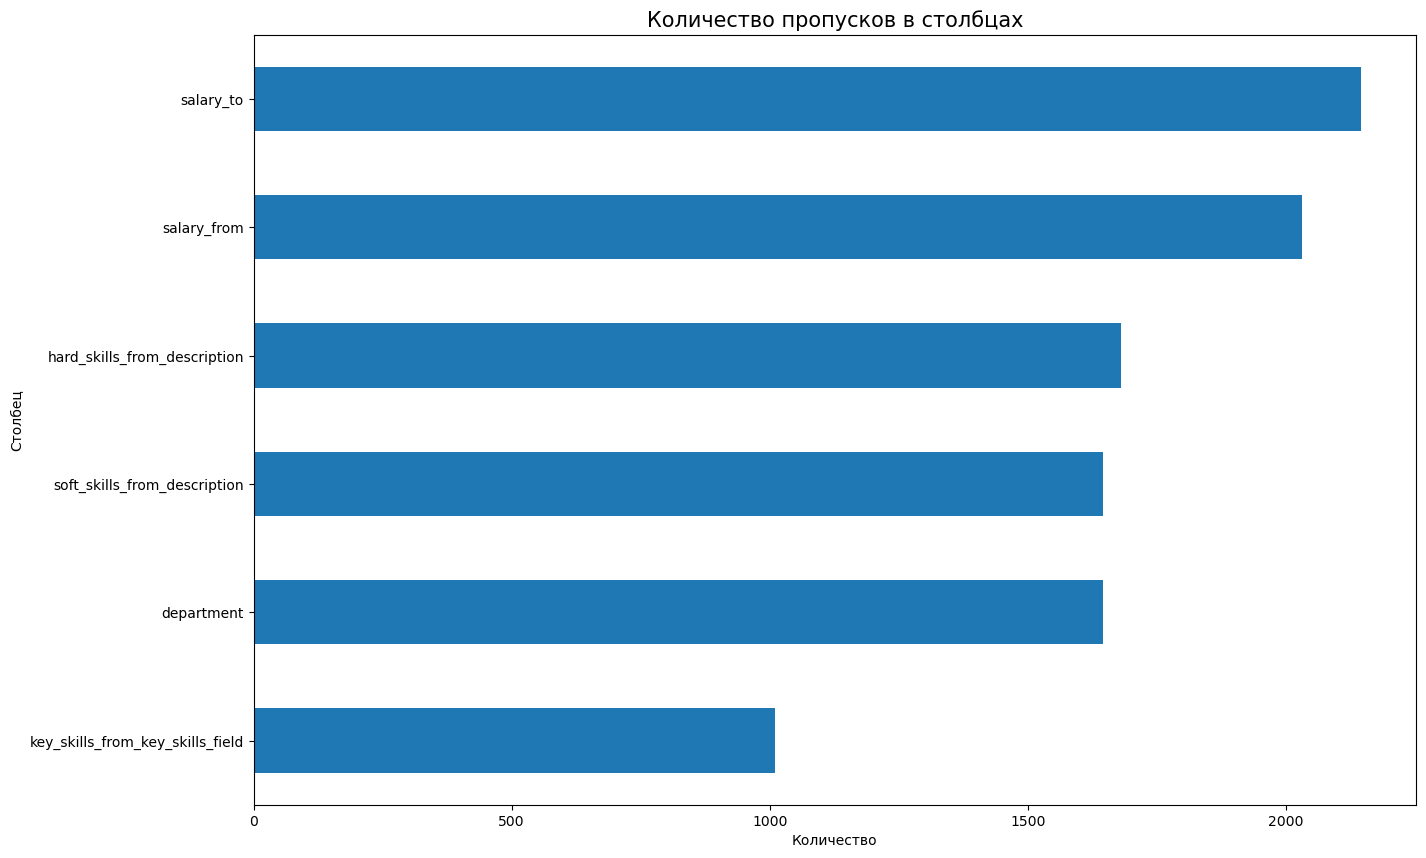

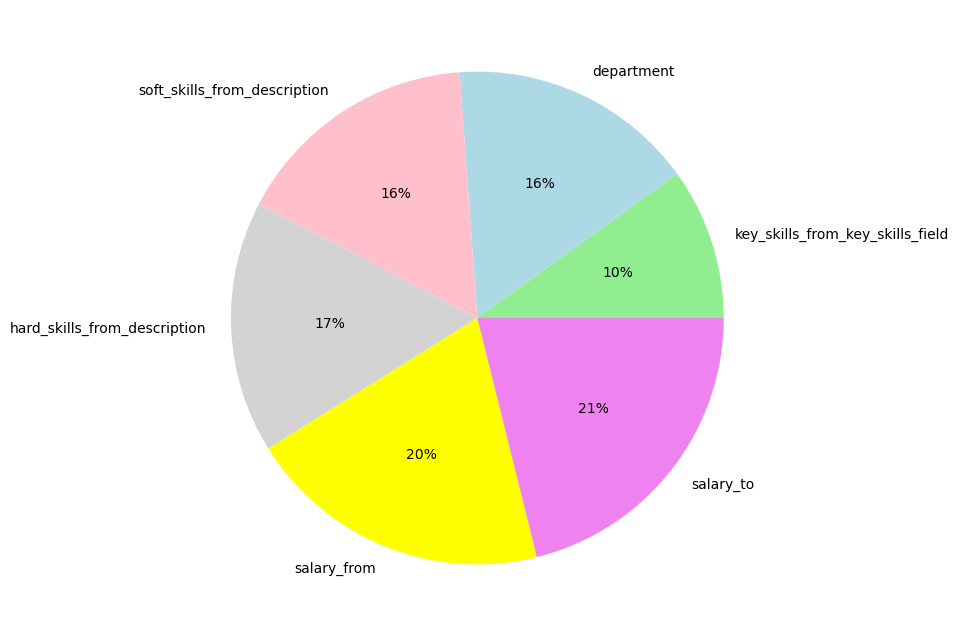

In [101]:
vacancies.isna().sum().sort_values().loc[vacancies.isna().sum() > 0].plot(kind='barh', figsize=(15, 10), grid=False)
plt.title('Количество пропусков в столбцах', fontsize=15)
plt.xlabel('Количество', fontsize=10)
plt.ylabel('Столбец', fontsize=10)
plt.show()

vacancies.isna().sum().sort_values().loc[vacancies.isna().sum() > 0].plot(kind='pie', figsize=(15, 8), grid=False, autopct='%1.0f%%', colors=['lightgreen', 'lightblue', 'pink', 'lightgrey', 'yellow', 'violet'])
plt.title('', fontsize=20)
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
plt.show()

***
В части отсутствия данных по ЗП можно предположить, что работодатели довольно часто ее не публикуют. а озвучивают при личном разговоре или собеседовании.
***

##### Проверим пропуски в столбцах с требуемыми навыками

In [104]:
vacancies[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].isna().sum()

key_skills_from_key_skills_field    1011
hard_skills_from_description        1681
soft_skills_from_description        1645
dtype: int64

***
Меньше всего пропусков в столбце key_skills_from_key_skills_field, заменим их навыками из key_skills.
***

In [107]:
(vacancies.query('key_skills_from_key_skills_field.isna() & key_skills.notna()')[['key_skills', 'key_skills_from_key_skills_field']]).count()

key_skills                          1011
key_skills_from_key_skills_field       0
dtype: int64

***
В key_skills имеется 1011 значений, приведем их к строковому типу, ими и заполним key_skills_from_key_skills_field.
***

In [110]:
vacancies['key_skills'] = vacancies['key_skills'].apply(lambda x: x.replace('"', '').replace('[', '').replace(']', '').replace("'", ""))
vacancies['key_skills'].value_counts()

key_skills
                                                                                                                                      473
Pandas                                                                                                                                156
Документация                                                                                                                           86
Коммуникация                                                                                                                           58
Аналитическое мышление                                                                                                                 45
                                                                                                                                     ... 
Анализ данных, SQL, Документация, Работа с большим объемом информации, Работа с базами данных, Аналитическое мышление, Базы данных      1
MS PowerPoint, Работа с

In [114]:
vacancies.loc[(vacancies['key_skills_from_key_skills_field'].isna()) & (vacancies['key_skills'] != ''), 'key_skills_from_key_skills_field'] = \
vacancies.loc[(vacancies['key_skills_from_key_skills_field'].isna()) & (vacancies['key_skills'] != ''), 'key_skills']

vacancies['key_skills_from_key_skills_field'].isna().sum()

473

***
После заполнения осталось 473 пропуска.
***

In [117]:
vacancies[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].isna().sum()

key_skills_from_key_skills_field     473
hard_skills_from_description        1681
soft_skills_from_description        1645
dtype: int64

In [119]:
vacancies[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].isna().mean() * 100

key_skills_from_key_skills_field    19.465021
hard_skills_from_description        69.176955
soft_skills_from_description        67.695473
dtype: float64

In [121]:
vacancies[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].notna().mean() * 100

key_skills_from_key_skills_field    80.534979
hard_skills_from_description        30.823045
soft_skills_from_description        32.304527
dtype: float64

***
После заполнения получилось, что Ключевые навыки key_skills_from_key_skills_field- наиболее полные.
***

## 4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.

***
Проанализируем грейды и построим круговые диаграммы для Аналитик данных и Специалист по Data Science.
***

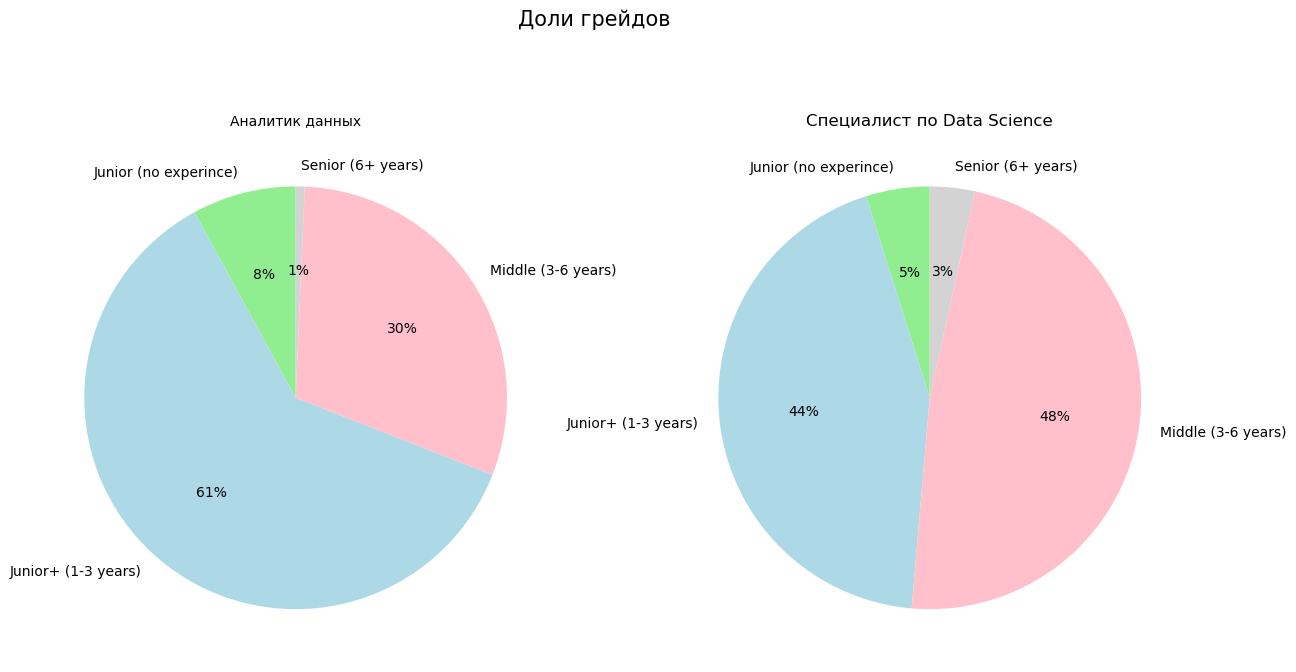

In [125]:
da_df = vacancies.loc[vacancies['vacancy_type']== 'da']['experience'].value_counts().sort_index()
ds_df = vacancies.loc[vacancies['vacancy_type']== 'ds']['experience'].value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].pie(da_df,
          labels= [lbl for lbl, value in da_df.items()],
          startangle=90,
          autopct='%1.f%%', colors=['lightgreen', 'lightblue', 'pink', 'lightgrey'])
ax[0].set_title('Аналитик данных', fontsize=10)

ax[1].pie(ds_df,
       labels= [lbl for lbl, value in ds_df.items()],
       startangle=90,
       autopct='%1.f%%', colors=['lightgreen', 'lightblue', 'pink', 'lightgrey'])
ax[1].set_title('Специалист по Data Science')

plt.suptitle('Доли грейдов', fontsize=15)
plt.show()

***
Как для вакансий Аналитик данных, так и для Специалист по Data Science, наиболее востребованные грейды: Junior+ (DA-61%, DS-44%), Middle (DA-30%, DS-48%), наименее востребованные- Senior (DA-1%, DS - 3%).
***

## 5. Определение типичного места работы для Аналитика данных и специалиста по Data Science по следующим параметрам:
   
- ТОП-работодателей
- зарплата
- тип занятости
- график работы

##### отдельно для грейдов Junior, Junior+, Middle, Senior.

***
Создадим функцию, которую будем использовать для построения графиков.В функции учитываются грейды.
***

In [148]:
def func_grade_for_charts(df, indicator_, title_):

    fig, ax = plt.subplots(2, 4, figsize=(25, 10))
    plt.suptitle(title_ + ' отдельно для грейдов Junior, Junior+, Middle, Senior', fontsize=16)

    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']

    for i in range(len(experience)):
      da_skils = (
          df.loc[(df['vacancy_type'] == 'da') & (df['experience'] == f'{experience[i]}')
          , indicator_]
          .value_counts()).reset_index().head(10)
      ds_skils = (
          df.loc[(df['vacancy_type'] == 'ds') & (df['experience'] == f'{experience[i]}')
          , indicator_]
          .value_counts()).reset_index().head(10)

      sns.barplot(x='count', y=indicator_, data=da_skils, ax=ax[0, i], color='lightblue')
      ax[0, i].set_title(f"Аналитик данных {experience[i]}", fontsize=14)
      ax[0, i].set_xlabel('')
      ax[0, i].set_ylabel('')

      sns.barplot(x='count', y=indicator_, data=ds_skils, ax=ax[1, i], color='lightpink')
      ax[1, i].set_title(f"Специалист Data Science {experience[i]}", fontsize=14)
      ax[1, i].set_xlabel('')
      ax[1, i].set_ylabel('')

    plt.subplots_adjust(wspace = 0.8)
    plt.show()

### ТОП-работодателей

***
Создадим таблицы для работодателей.
***

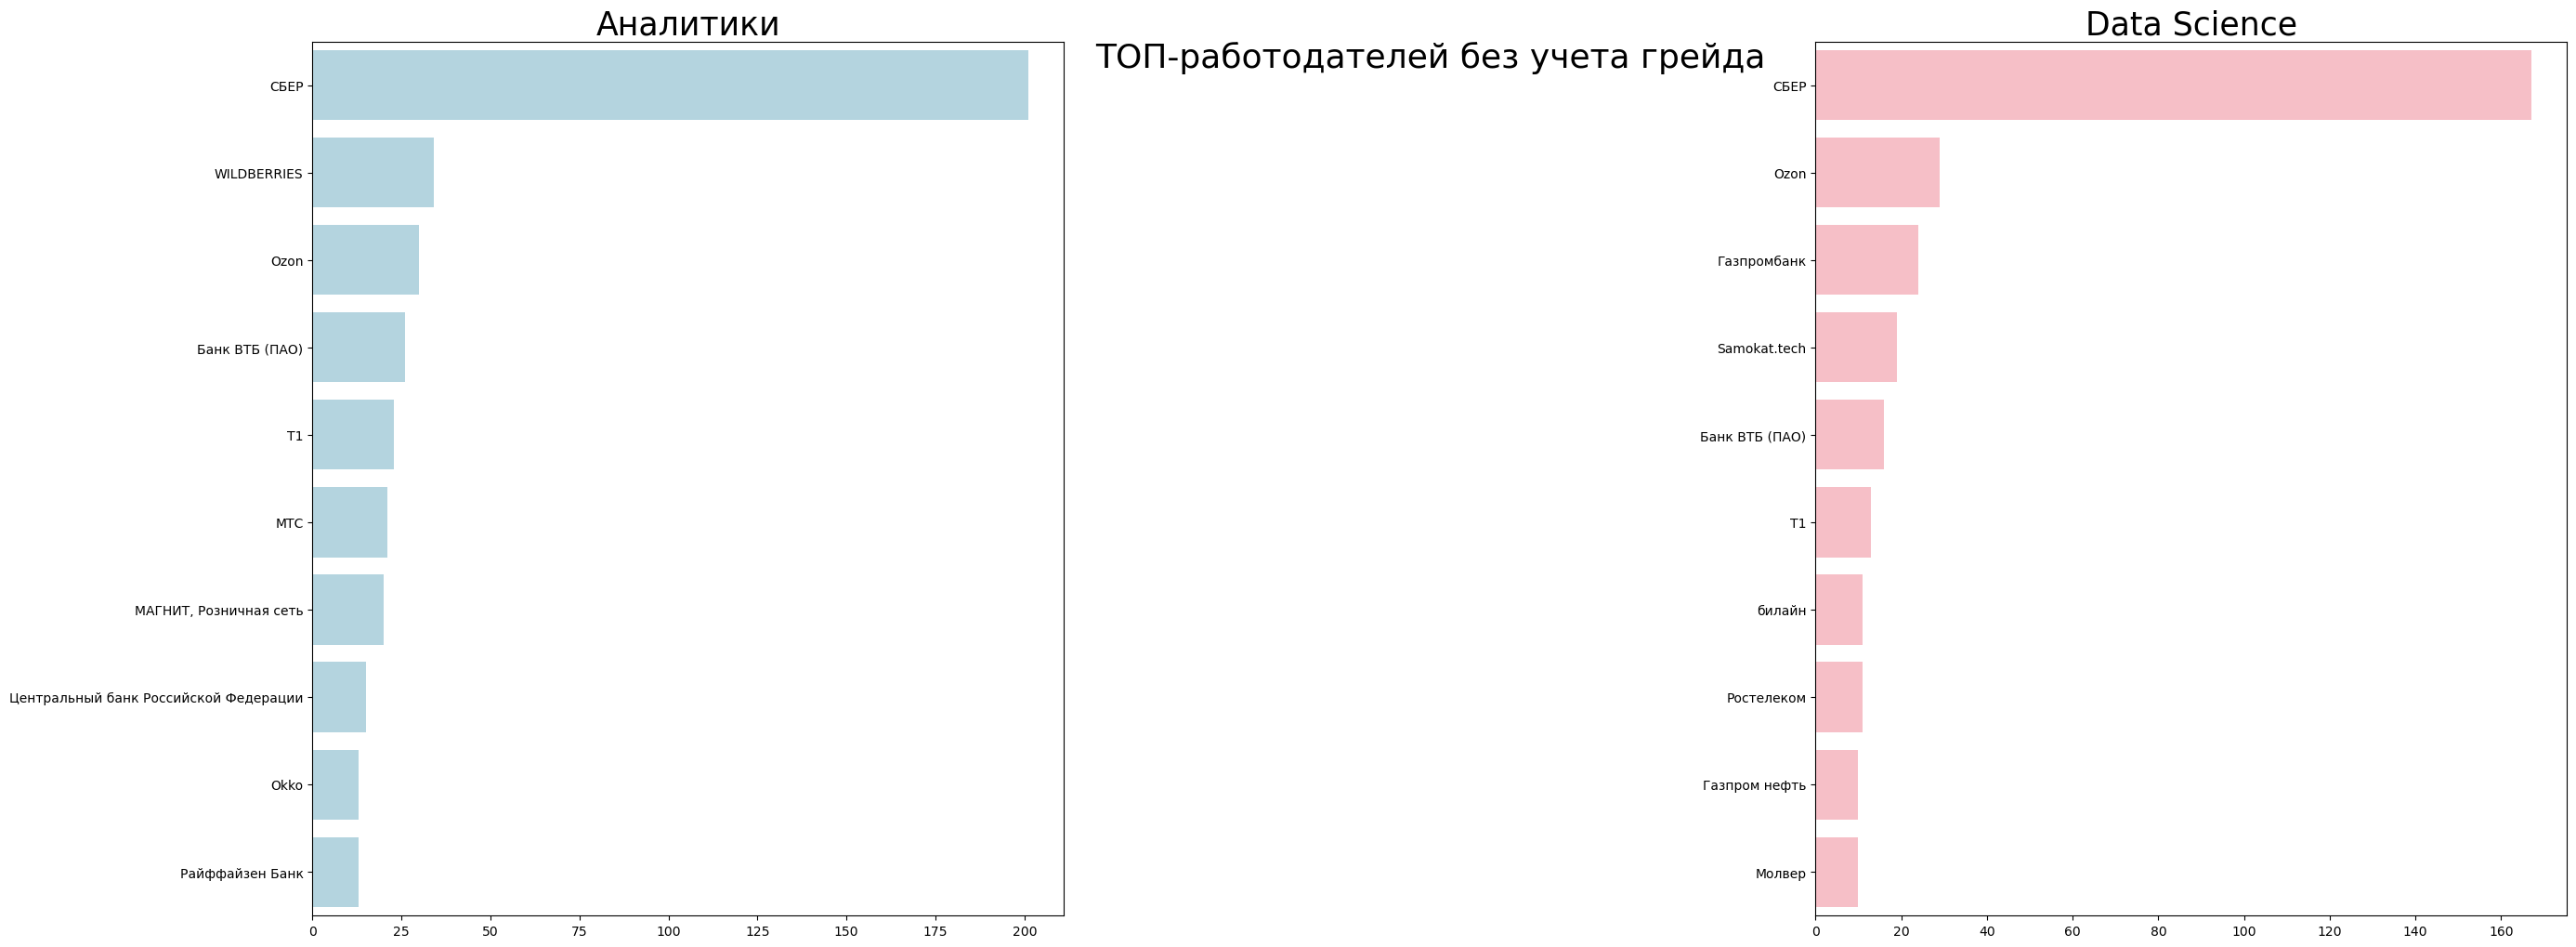

In [151]:
da_df = vacancies.loc[vacancies['vacancy_type']== 'da']['employer'].value_counts().reset_index().head(10)
ds_df = vacancies.loc[vacancies['vacancy_type']== 'ds']['employer'].value_counts().reset_index().head(10)

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
fig. tight_layout ()

plt.suptitle('ТОП-работодателей без учета грейда', fontsize=26)

sns.barplot(x='count', y='employer', data=da_df, ax=ax[0], color='lightblue')
ax[0].set_title(f"Аналитики", fontsize=25)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(x='count', y='employer', data=ds_df, ax=ax[1], color='lightpink')
ax[1].set_title(f"Data Science", fontsize=25)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace = 1)
plt.show()

***
Топовый работодатель для обеих вакансий- СБЕР.
Далеев ТОП-5: WB, Ozon, ГПБ, ВТБ, Самокат.
***

#### * Интересные факты, число сотрудников на 2023 год:
- СБЕР - 210 тыс. человек
- WB - 154 тыс. человек
- ВТБ - 79 тыс. человек
- OZON - 46 тыс. человек
- Самокат - 30 тыс. человек
- ГПБ - 20 тыс. человек


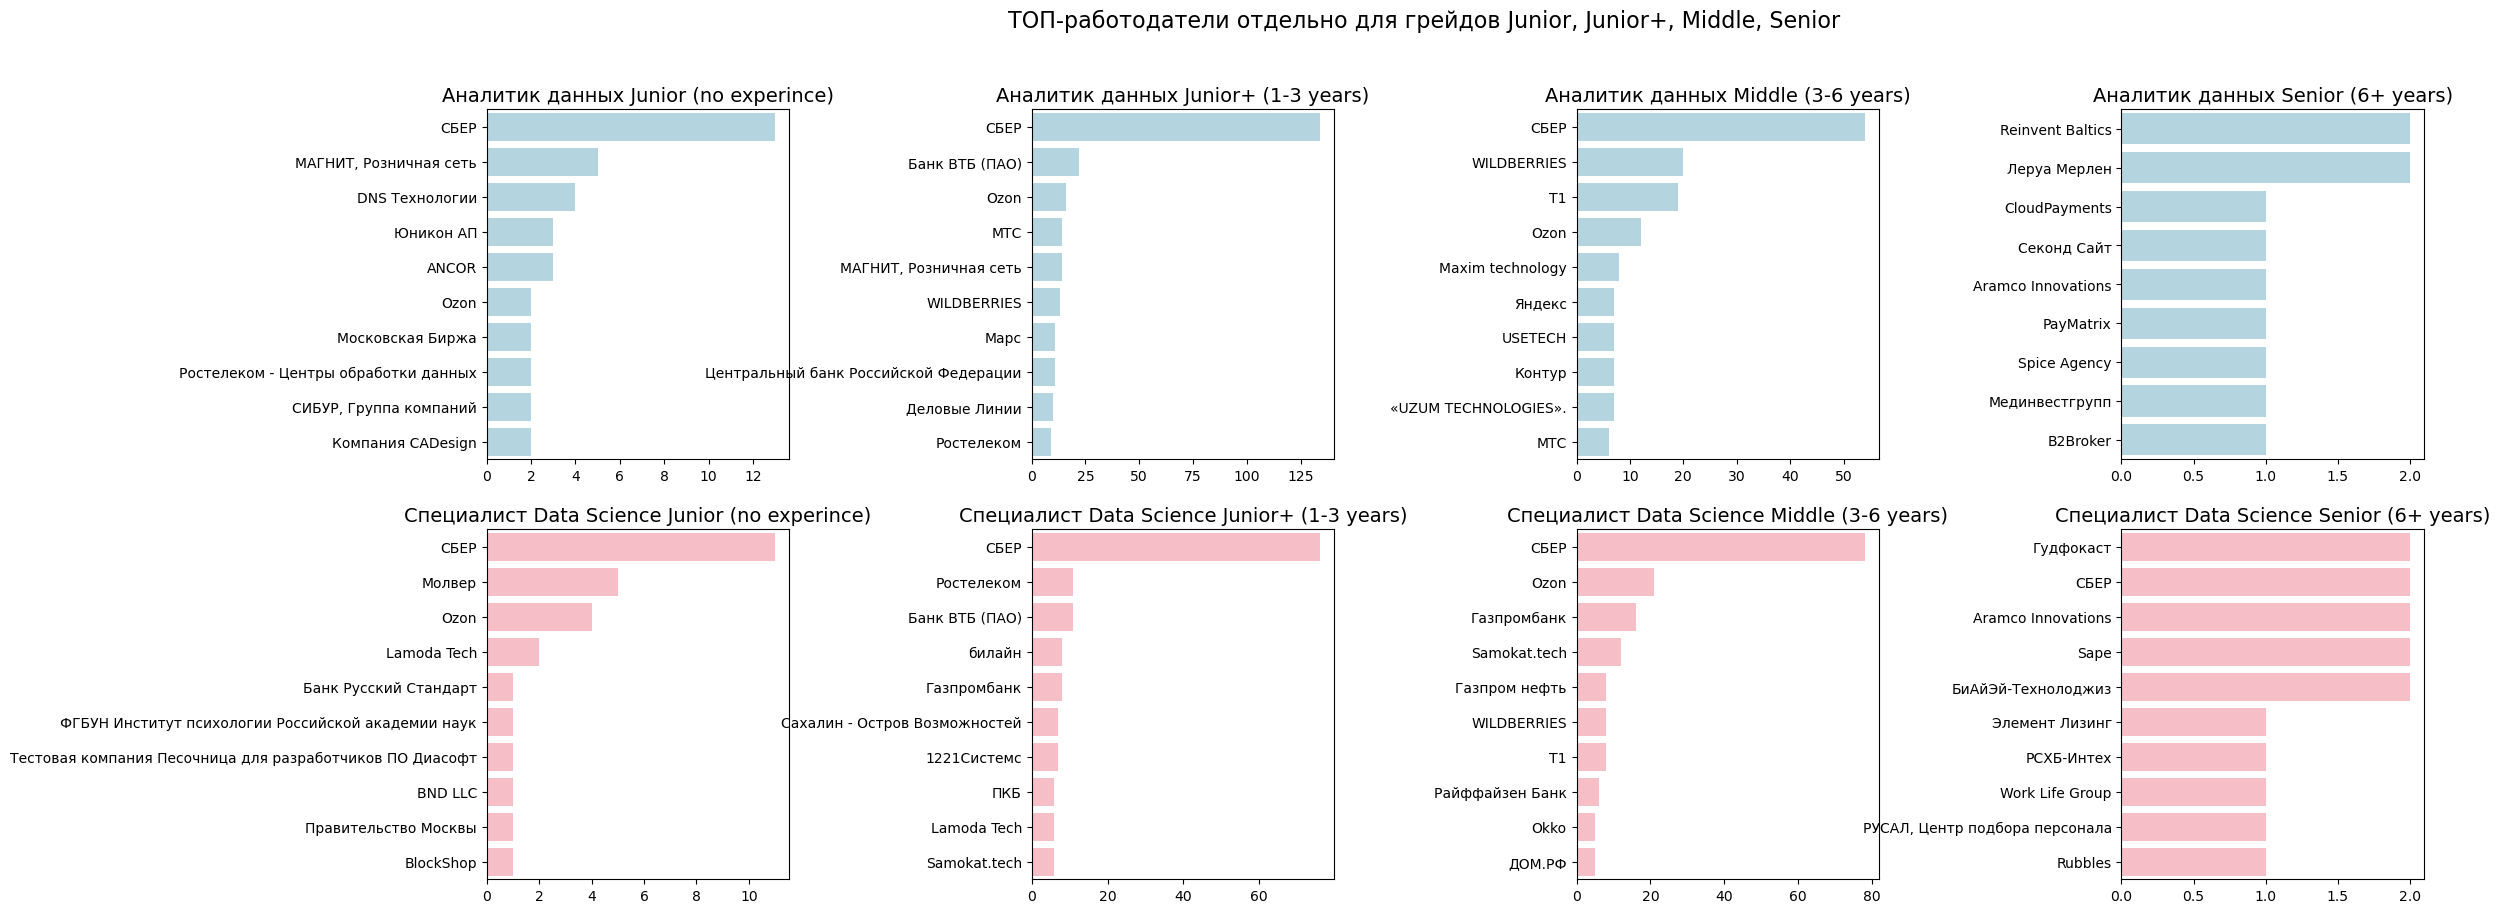

In [154]:
df = vacancies
indicator_ = 'employer'
title_ = 'ТОП-работодатели'
func_grade_for_charts(df, indicator_, title_)

***
Топовый работодатель для всех грейдов, кроме Senior- СБЕР. Для Senior ТОП: Reinvent Baltics, Leroy Merlin, Гудфокаст.

***

##### Зарплата

***
Можно проверитьт, есть ли вакансии, в которых не указана ЗП, но какм-то образом имеется нижняя или верхняя граница.
Если такие найдутся, заменим пропуски нижней или верхней границей с помощью функции.
***

In [157]:
vacancies.loc[(vacancies['salary_bin'] == 'ЗП не указана') & (vacancies['salary_from'].notna())]['id'].count()

213

In [159]:
vacancies.loc[(vacancies['salary_bin'] == 'ЗП не указана') & (vacancies['salary_to'].notna())]['id'].count()

0

In [167]:
def func_salary(row: pd.Series):
  if row['salary_bin'] == 'ЗП не указана':
    if row.isna()['salary_from']:
      return 'ЗП не указана'
    elif row['salary_from'] < 100000:
      return 'Меньше 100 тысяч'
    elif row['salary_from'] >= 100000 and row['salary_from'] < 200000:
      return 'От 100 тысяч до 200 тысяч'
    elif row['salary_from'] >= 200000 and row['salary_from'] < 300000:
      return 'От 200 тысяч до 300 тысяч'
    else:
      return 'Больше 300 тысяч'
  else:
    return row['salary_bin']

vacancies['salary_bin'] = vacancies.apply(func_salary, axis=1)

***
Создадим таблицы для вакансий.
***

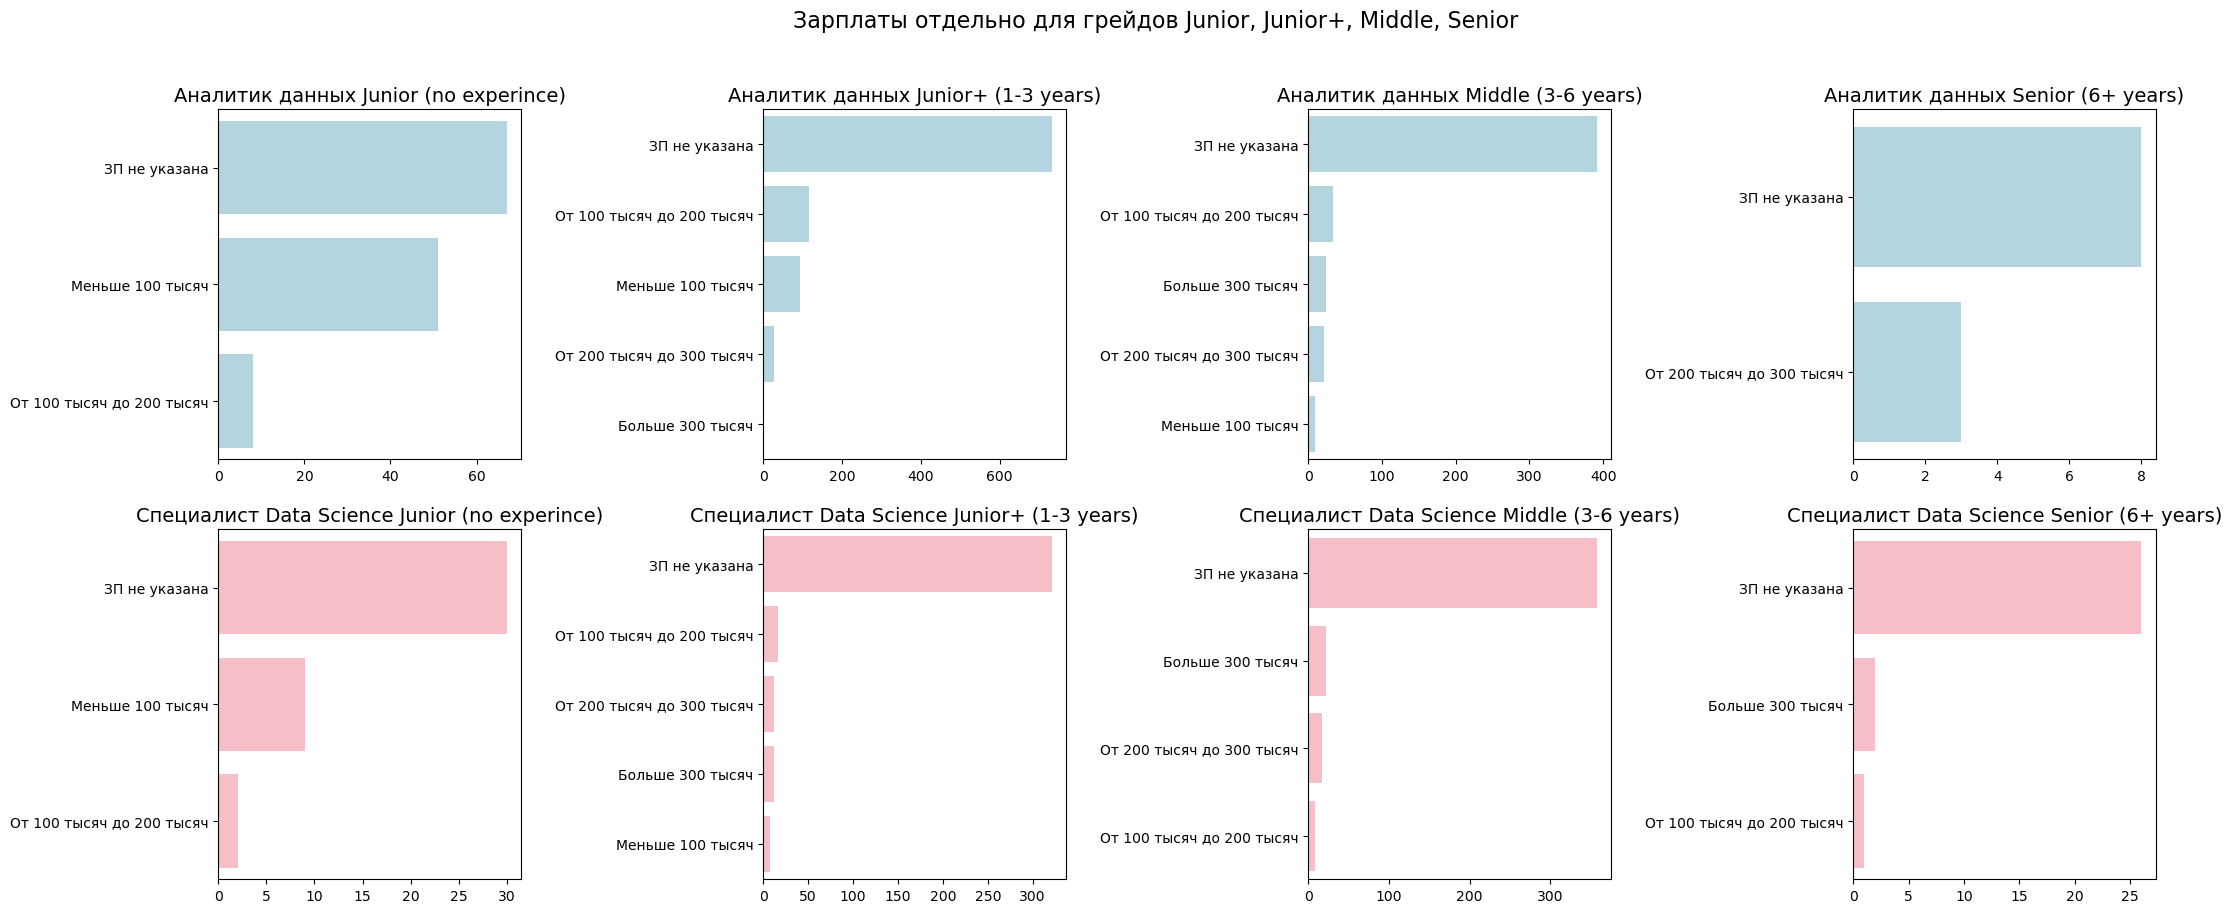

In [172]:
da_df = vacancies.loc[vacancies['vacancy_type']== 'da']['salary_bin'].value_counts().reset_index().head(10)
ds_df = vacancies.loc[vacancies['vacancy_type']== 'ds']['salary_bin'].value_counts().reset_index().head(10)

df = vacancies
indicator_ = 'salary_bin'
title_ = 'Зарплаты'
func_grade_for_charts(df, indicator_, title_)

***
- Джуны могут рассчитывать на 100-200 тыс. руб.,
- Мидлы - 100-300 тыс. руб.,
- Синьоры - 300К +
***

##### Тип занятости

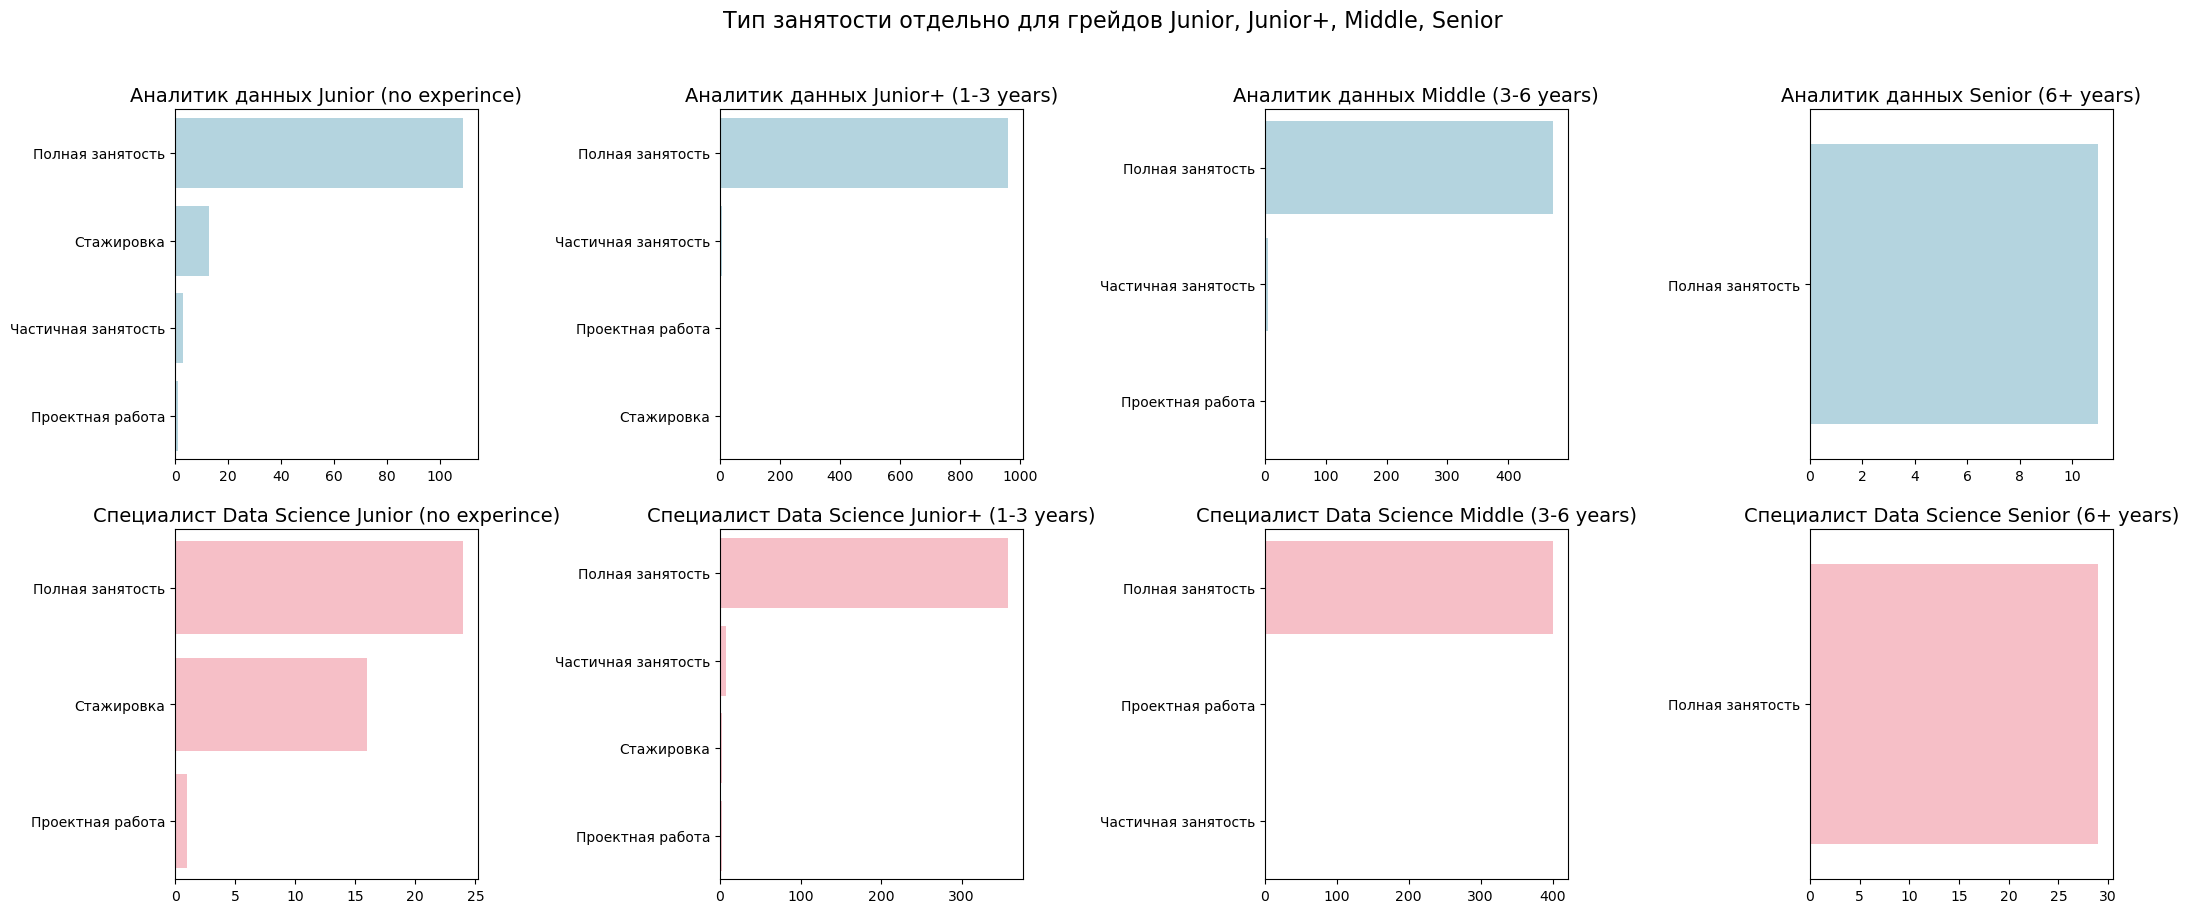

In [177]:
df = vacancies
indicator_ = 'employment'
title_ = 'Тип занятости'
func_grade_for_charts(df, indicator_, title_)

***
Видно, что работодатели предпочитают набирать сотрудников на полную ставку.
***

##### График работы

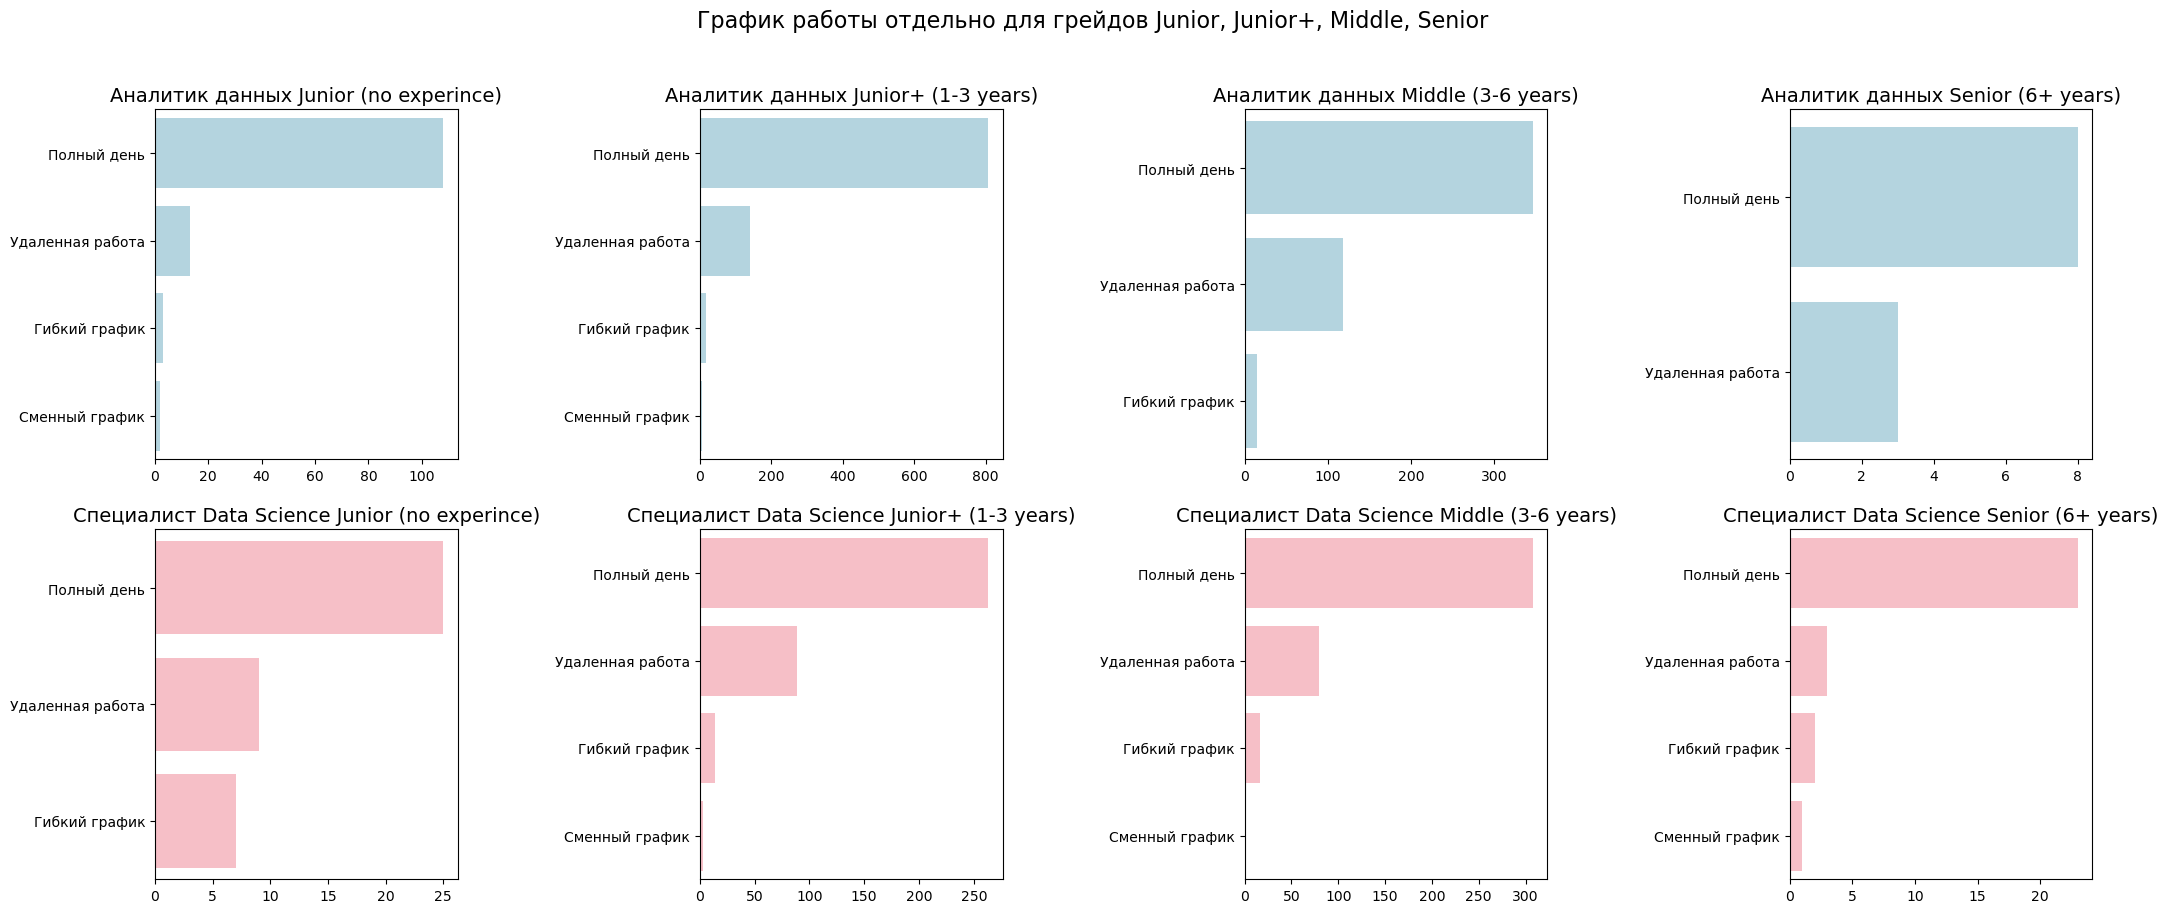

In [180]:
df = vacancies
indicator_ = 'schedule'
title_ = 'График работы'
func_grade_for_charts(df, indicator_, title_)

***
Так как пандемия повержена, работодатели предпочитают набирать сотрудников на полный рабочий день, реже- на удаленку и уж совсем редко- гибкий и сменный..
***

## 6. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам:
   
- самые важные hard-skils
- самые важные soft-skils
      
##### отдельно для грейдов Junior, Junior+, Middle, Senior.

***
Подготовим таблицу с ключевыми навыками/скиллами, преобразуем в список и преобразуем скиллы в отдельные строки, отчсечем пробелы.
***

In [128]:
skills = vacancies[['id', 'vacancy_type', 'experience', 'key_skills_from_key_skills_field']].reset_index(drop=True)
skills['key_skills_from_key_skills_field'] = skills['key_skills_from_key_skills_field'].str.split(',')
skills = skills.explode('key_skills_from_key_skills_field')
skills['key_skills_from_key_skills_field'] = (skills['key_skills_from_key_skills_field'].str.lower().str.strip())

***
Построим графики рейтингов скиллов.
***

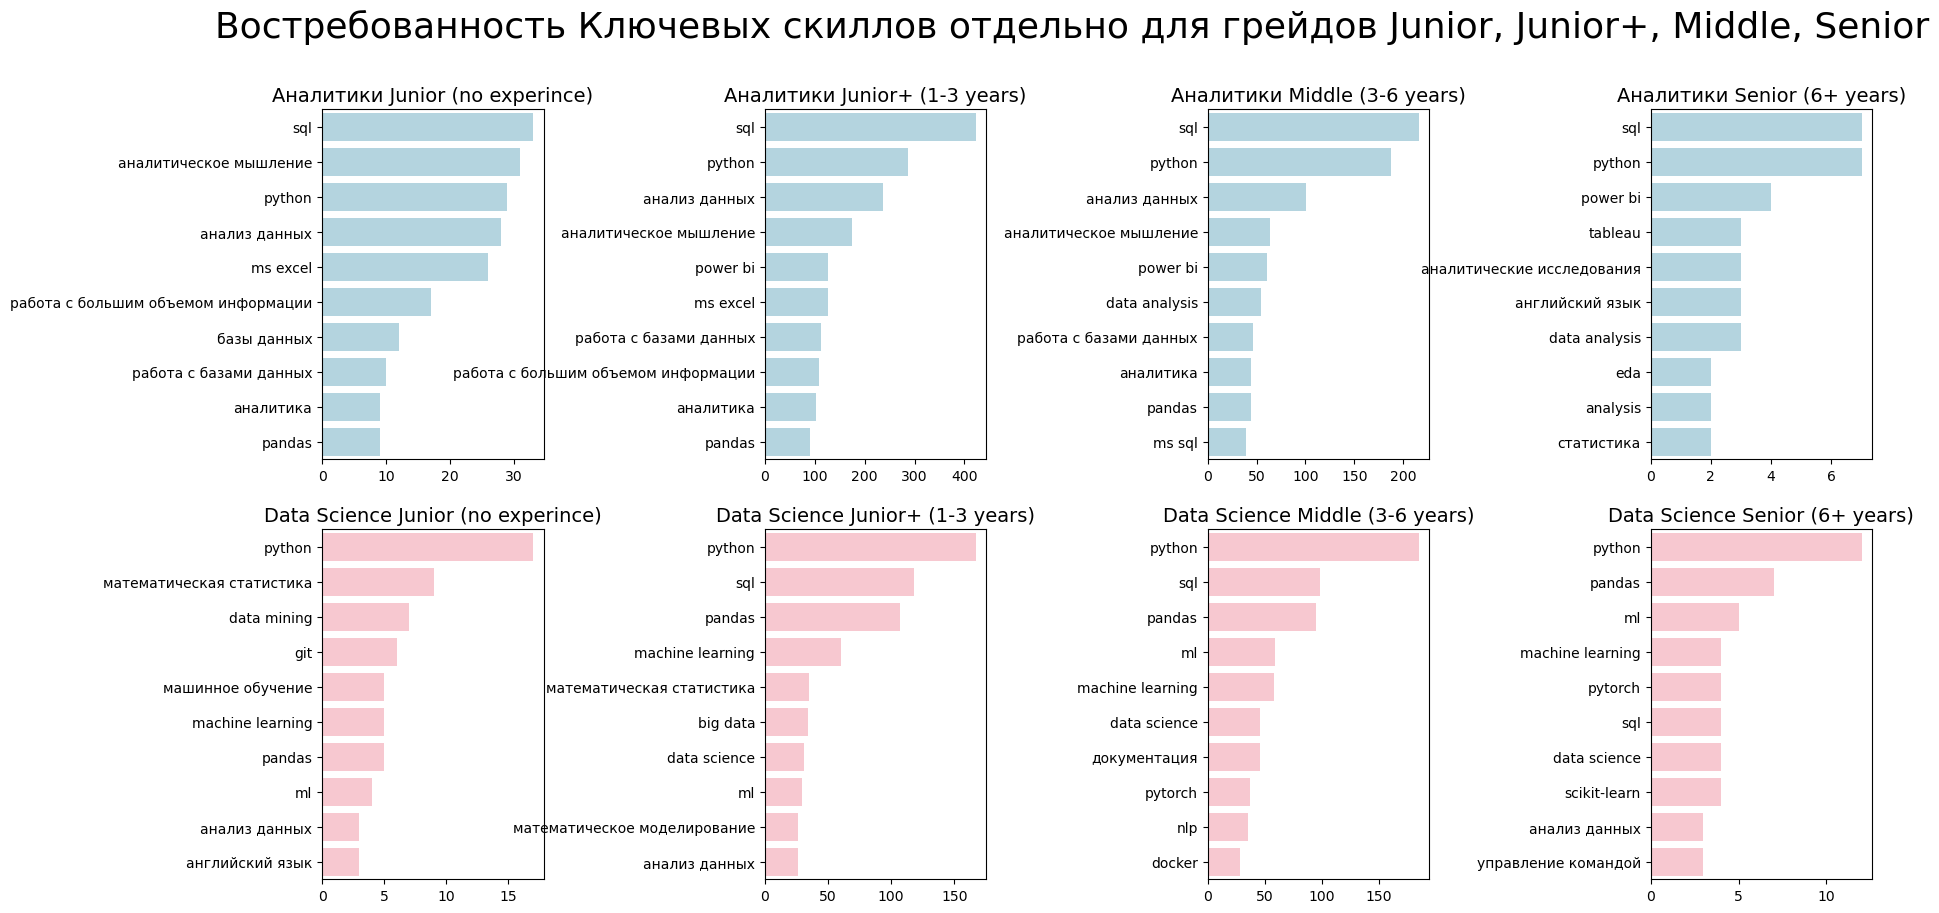

In [131]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
plt.suptitle('Востребованность Ключевых скиллов отдельно для грейдов Junior, Junior+, Middle, Senior', fontsize=26)

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skils = (
      skills.loc[(skills['vacancy_type'] == 'da') & (skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)
  ds_skils = (
      skills.loc[(skills['vacancy_type'] == 'ds') & (skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)

  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=da_skils, ax=ax[0, i], color='lightblue')
  ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')


  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=ds_skils, ax=ax[1, i], color='pink')
  ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.subplots_adjust(wspace = 1)
plt.show()

***
Для вакансии Аналитик данных наиболее требовательные скиллы: SQL, Python, Анализ данных. Для вакансии Специалист по Data Science: Python, библиотека Pandas. Также для Data Science Senior требуется специфическая библиотека Scikit-learn.
***

***
Подготовим таблицу с Hard-skills навыками/скиллами, преобразуем в список и преобразуем скиллы в отдельные строки, отчсечем пробелы.
***

In [134]:
skills = vacancies[['id', 'vacancy_type', 'experience', 'hard_skills_from_description']].reset_index(drop=True)
skills['hard_skills_from_description'] = skills['hard_skills_from_description'].str.split(',')
skills = skills.explode('hard_skills_from_description')
skills['hard_skills_from_description'] = (skills['hard_skills_from_description'].str.lower().str.strip())

***
Построим графики рейтингов скиллов.
***

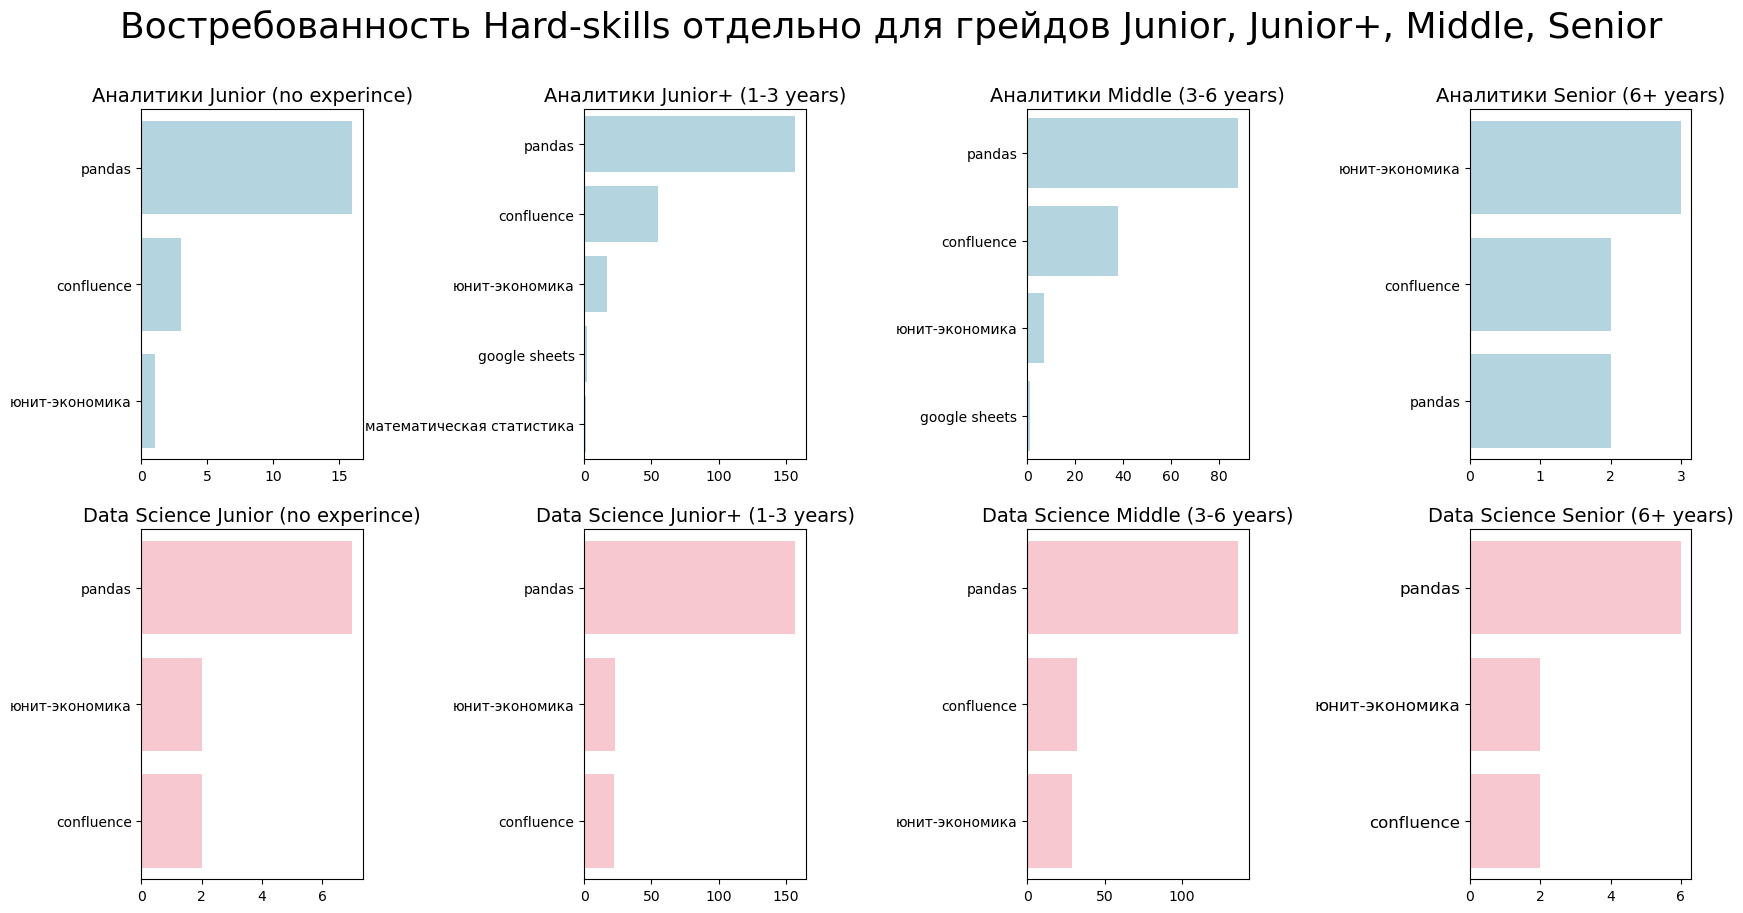

In [137]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
plt.suptitle('Востребованность Hard-skills отдельно для грейдов Junior, Junior+, Middle, Senior', fontsize=26)

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skils = (
      skills.loc[(skills['vacancy_type'] == 'da') & (skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)
  ds_skils = (
      skills.loc[(skills['vacancy_type'] == 'ds') & (skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)

  sns.barplot(x='count', y='hard_skills_from_description', data=da_skils, ax=ax[0, i], color='lightblue')
  ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  sns.barplot(x='count', y='hard_skills_from_description', data=ds_skils, ax=ax[1, i], color='pink')
  ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 1)
plt.show()

***
Для вакансии Аналитик данных наиболее требовательные Хард-скиллы: библиотека Pandas. Для вакансии Специалист по Data Science: библиотека Pandas. 
***

In [140]:
skills = vacancies[['id', 'vacancy_type', 'experience', 'soft_skills_from_description']].reset_index(drop=True)
skills['soft_skills_from_description'] = skills['soft_skills_from_description'].str.split(',')
skills = skills.explode('soft_skills_from_description')
skills['soft_skills_from_description'] = (skills['soft_skills_from_description'].str.lower().str.strip())

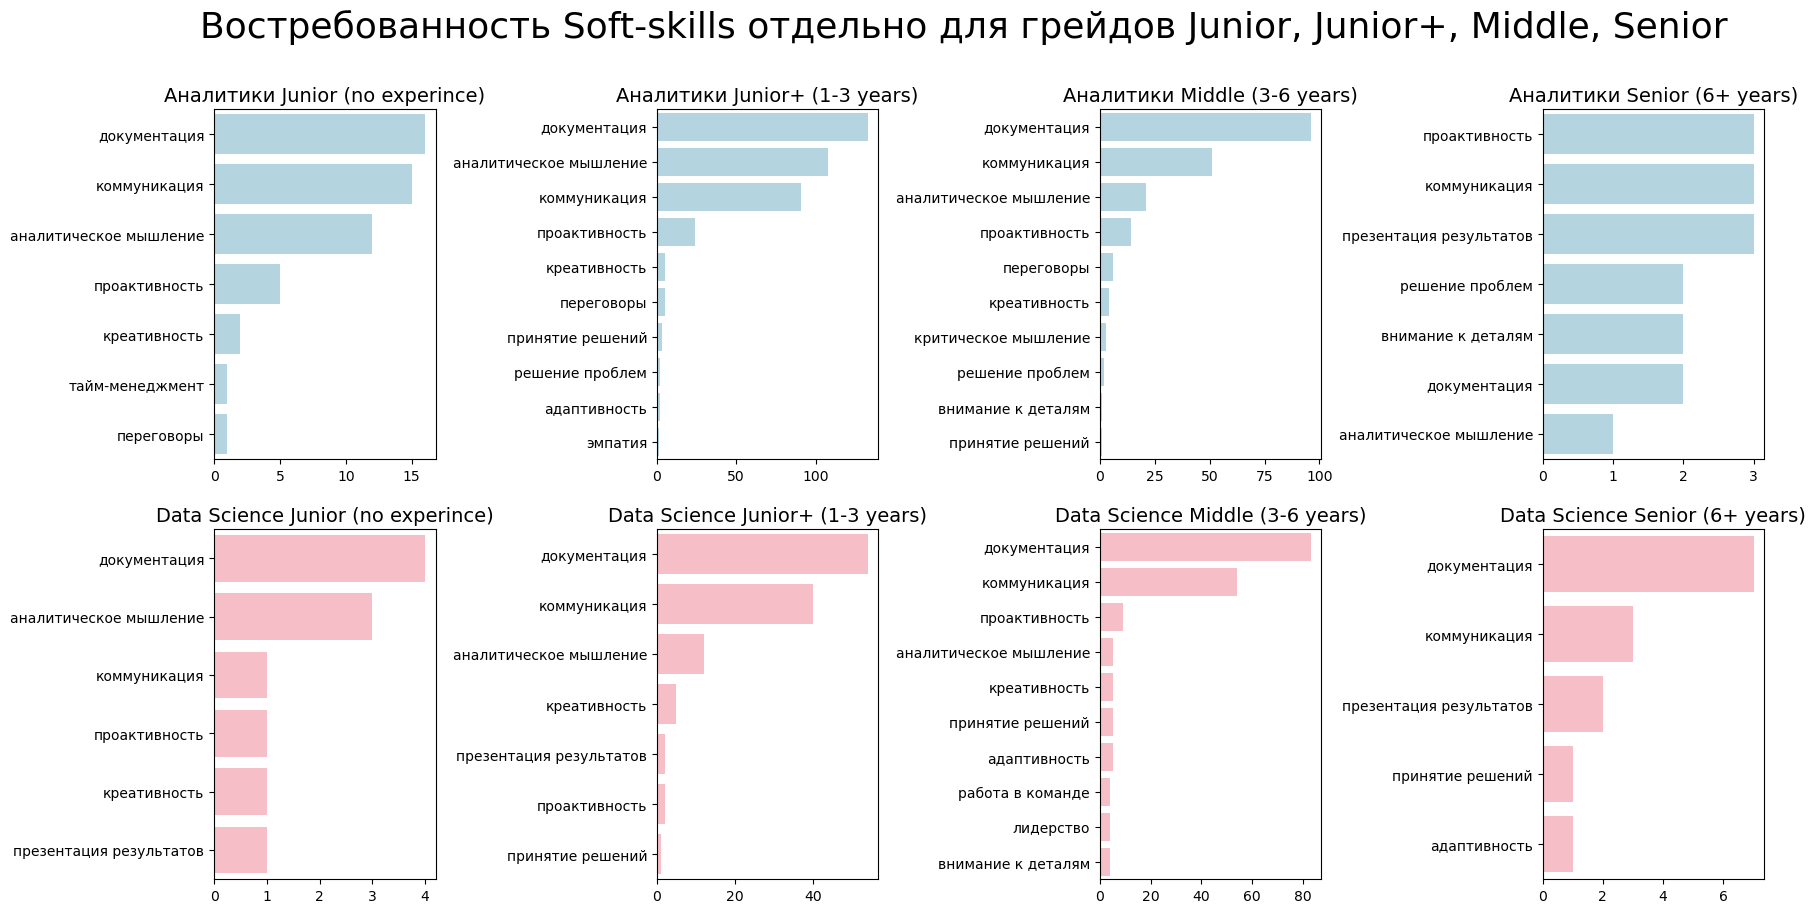

In [142]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

plt.suptitle('Востребованность Soft-skills отдельно для грейдов Junior, Junior+, Middle, Senior', fontsize=26)

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skils = (
      skills.loc[(skills['vacancy_type'] == 'da') & (skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)
  ds_skils = (
      skills.loc[(skills['vacancy_type'] == 'ds') & (skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)

  sns.barplot(x='count', y='soft_skills_from_description', data=da_skils, ax=ax[0, i], color='lightblue')
  ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  sns.barplot(x='count', y='soft_skills_from_description', data=ds_skils, ax=ax[1, i], color='lightpink')
  ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.subplots_adjust(wspace = 1)
plt.show()

***
Для вакансии Аналитик данных наиболее требовательные Софт-скиллы: документация, аналитическое мышление и коммуникация. Для вакансии Специалист по Data Science: документация, аналитическое мышление и коммуникация. 
***

## 7. Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейдуи к какой специальности требований больше.

***
Работа с документацией, аналитическое мышление и коммуникация остро необходимы в данных профессиях, так как требуется тесное взаимодействие со смежными подразделениями.
***

## 8. Расчет помесячной динамику количества вакансий для Аналитика данных и специалиста по Data Science.
   Отдельно для грейдов Junior, Junior+, Middle, Senior.

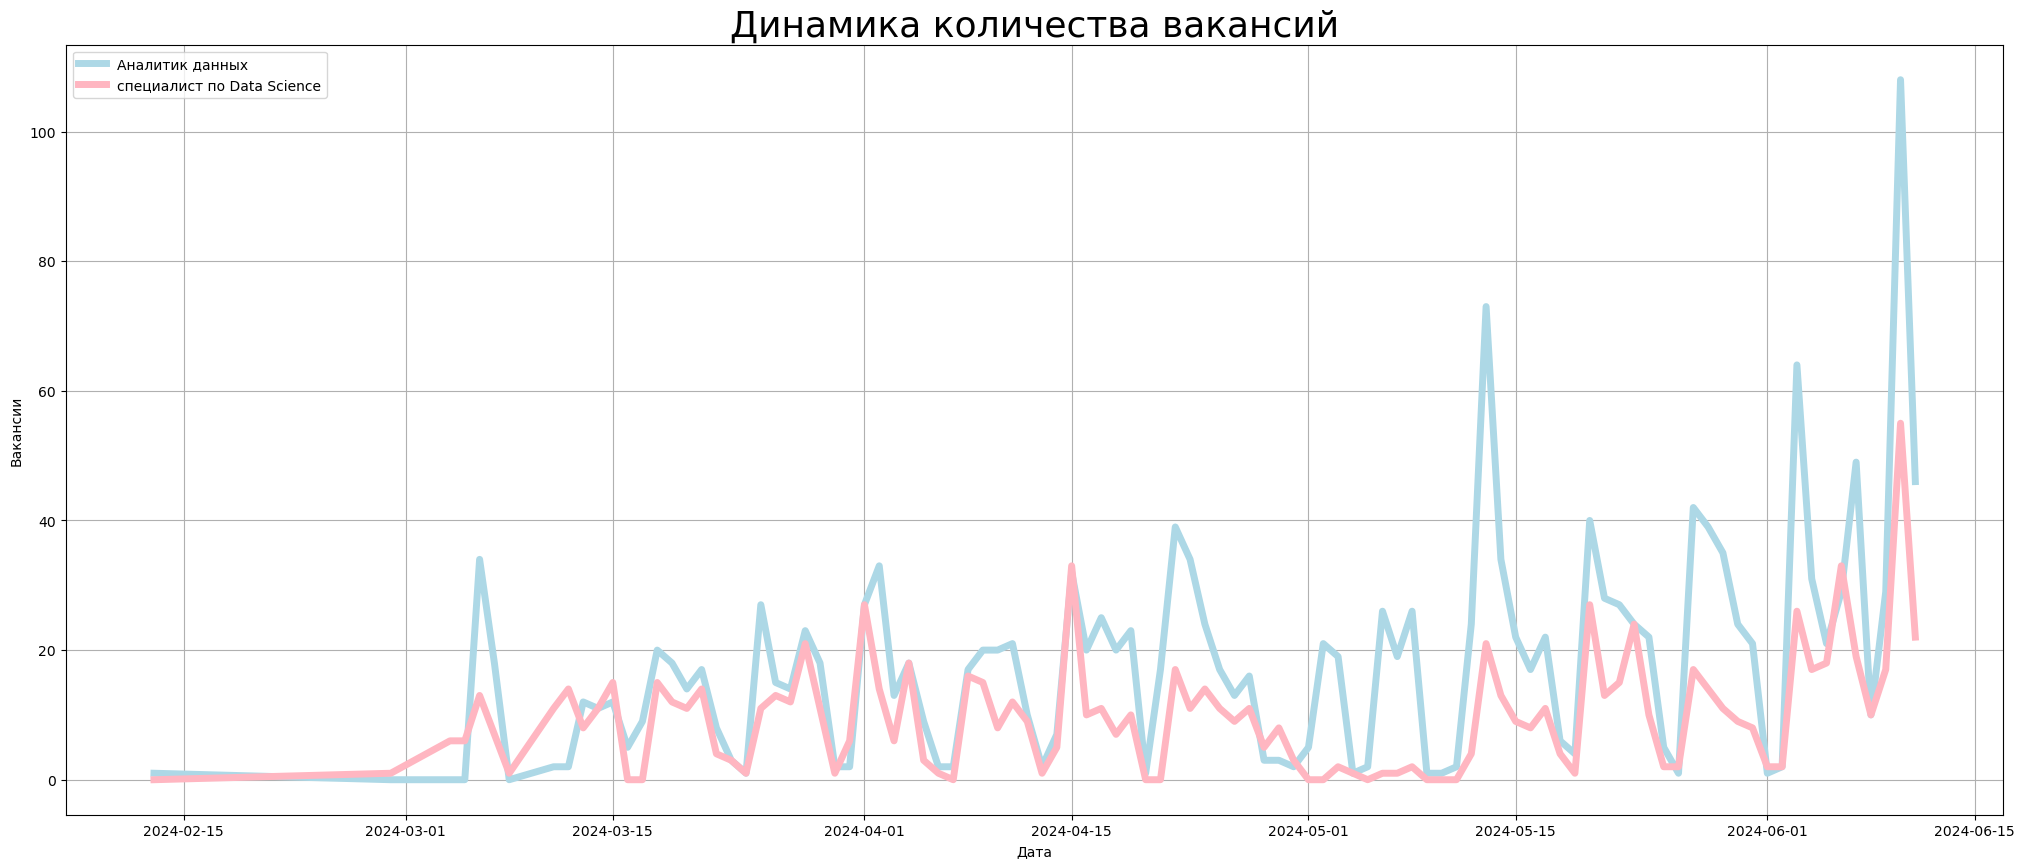

In [186]:
vacancies_dynamic = pd.concat([df_da, df_ds])
vacancies_dynamic = vacancies_dynamic[['id', 'vacancy_type', 'published_at']].sort_values(by='published_at')
vacancies_dynamic['published_at'] = vacancies_dynamic['published_at'].dt.date

vacancies_dynamic.pivot_table(index='published_at', columns='vacancy_type', values = 'id', aggfunc='count').fillna(0).plot(figsize=(25, 10), linewidth= 5, grid=True, color=['lightblue', 'lightpink'])

plt.title('Динамика количества вакансий', fontsize=26)
plt.xlabel('Дата')
plt.ylabel('Вакансии')
plt.legend(['Аналитик данных', 'специалист по Data Science'])
plt.show()

***
Аналитики данных - более востребованная вакансия в периоде.
Летом спрос больше, так как отпуска, и вакансии не закрываются.
***

## 9. Формулирование выводовы и рекомендаций.

Анализ проводился на основе данных полученных из API сайта HH.ru. Данные прошли предобработку и очистку.

Ссылки на данные:
- vacancies_ds.xlsx - вакансии специалиста по Data Science. ссылка для скачивания: https://disk.yandex.ru/d/en_e87RKy9akHg
- vacancies_da.xlsx - вакансии Аналитика данных. ссылка для скачивания: https://disk.yandex.ru/d/en_e87RKy9akHg

#### 1. Предобработка данных

В каждой таблице по 20 совпадающих столбцов.
- Добавили  в таблицы новый столбец vacancy_type с метками da = Аналитик данных, ds =  Data Science.
- Объединили две таблицы df_da и df_ds в одну для удобства.
- Проверили типы данных в таблице. Типы данных соответствуют назначениям полей.
- Проверили на дубликаты. 

- Нашлись вакансии с одинаковыми айдишниками, они полностью идентичные и отличаются лишь типом da и ds.
- Также нашлись вакансии, у которых одинаковая начинка, а id идата публикации- разные. Эти строки удалили. % удаленных дуликатов от датасета составил ~12%.

#### 2. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.

Выполнили проверку на неявные дубликаты для:

- ТОП-5 вакансий,

    - Аналитик данных                                                                409
    - Data Scientist                                                                 111
    - Data Analyst                                                                    80
    - Ведущий аналитик данных                                                         27
    - Senior Data Scientist                                                           24

- ТОП- 5 работодателоей,

    - СБЕР                            368
    - Ozon                             59
    - WILDBERRIES                      44
    - Банк ВТБ (ПАО)                   42
    - Т1                               36

- ТОП- 5 географии, городов по количеству вакансий

    - Москва             1738
    - Санкт-Петербург     234
    - Екатеринбург         65
    - Новосибирск          55
    - Нижний Новгород      47

- опыта,

     - Junior+ (1-3 years)      1339
     - Middle (3-6 years)        884
     - Junior (no experince)     167
     - Senior (6+ years)          40

- зарплаты,

     - ЗП не указана                2145
     - От 100 тысяч до 200 тысяч     106
     - Меньше 100 тысяч               70
     - Больше 300 тысяч               57
     - От 200 тысяч до 300 тысяч      52

- навыков

- ТОП-5 key_skills
    - SQL, Python 31
    - Python, SQL 20
    - SQL 10
    - Python 9
    - SQL, Python, A/B тесты 8
   
- ТОП-5 hard_skills
    - Pandas                                508
    - confluence                            108
    - Юнит-экономика                         68
    - Pandas, confluence                     45
    - Pandas, Юнит-экономика                 13

- ТОП-5 soft_skills
    - Документация                                                                       308
    - Коммуникация                                                                       168
    - Аналитическое мышление                                                             112
    - Коммуникация, Документация                                                          42
    - Проактивность                                                                       39

#### 3. Исследовательский анализ данных.

Искали пропуски в  столбцах датасета:

- Зарплата. Были найдены пропуски по ЗП, работодатели довольно часто ее не публикуют, а озвучивают при личном разговоре или собеседовании.
- Навыки, скиллы. Нашлись пропуски в key_skills_from_key_skills_field, заменили 538 значений навыками из key_skills.После заполнения получилось, что Ключевые навыки key_skills_from_key_skills_field- наиболее полны - 80.53% заполнения, против hard_skills_from_description- 30.82%
soft_skills_from_description- 32.30%.

#### 4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.

Проанализировали грейды и построили круговые диаграммы для Аналитик данных и Специалист по Data Science:

Как для вакансий Аналитик данных, так и для Специалист по Data Science, наиболее востребованные грейды: Junior+ (DA-61%, DS-44%), Middle (DA-30%, DS-48%), наименее востребованные- Senior (DA-1%, DS - 3%).

#### 5. Определение типичного места работы для Аналитика данных и специалиста по Data Science

ТОП-работодатели.
- Топовый работодатель для обеих вакансий- СБЕР.
Далеев ТОП-5: WB, Ozon, ГПБ, ВТБ, Самокат.

Зарплаты
- Джуны могут рассчитывать на 100-200 тыс. руб.,
- Мидлы - 100-300 тыс. руб.,
- Синьоры - 300К +

Тип занятости. 
- Выяснили, что работодатели предпочитают набирать сотрудников на полную ставку.

График работы. 
- Так как пандемия повержена, работодатели предпочитают набирать сотрудников на полный рабочий день, реже- на удаленку и уж совсем редко- гибкий и сменный.

#### 6. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science

- Ключевые навыки. Для вакансии Аналитик данных наиболее требовательные скиллы: SQL, Python, Анализ данных. Для вакансии Специалист по Data Science: Python, библиотека Pandas. Также для Data Science Senior требуется специфическая библиотека Scikit-learn.

- Хард-скиллы. Для вакансии Аналитик данных наиболее требовательные Хард-скиллы: библиотека Pandas. Для вакансии Специалист по Data Science: библиотека Pandas. 

-Софт-скиллы. Для вакансии Аналитик данных наиболее требовательные Софт-скиллы: документация, аналитическое мышление и коммуникация. Для вакансии Специалист по Data Science: документация, аналитическое мышление и коммуникация. 

#### 7. Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейдуи к какой специальности требований больше.

Работа с документацией, аналитическое мышление и коммуникация остро необходимы в данных профессиях, так как требуется тесное взаимодействие со смежными подразделениями.

#### 8. Расчет помесячной динамику количества вакансий для Аналитика данных и специалиста по Data Science.

Аналитики данных- наиболее востребованная вакансия в периоде. Летом спрос на сотрудников больше, так как отпуска, и вакансии не закрываются.